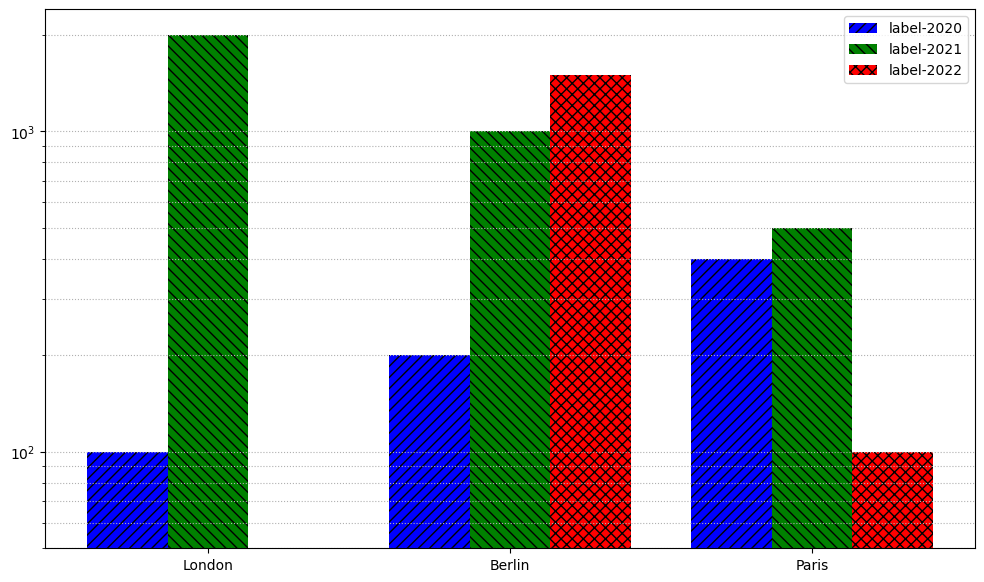

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


d = { 
  "shop": [ "London", "Berlin", "Paris" ],
  "sales-2020": [ 100, 200, 400 ],
  "sales-2021": [ 2000, 1000, 500 ],
  "sales-2022": [ 50, 1500, 100 ]
}
years = [ 2020, 2021, 2022 ]

_d = { 
  "shop": [ "London", "Berlin", "Paris" ],
  "sales-2019": [ 200, 400, 800 ],
  "sales-2020": [ 100, 200, 400 ],
  "sales-2021": [ 2000, 1000, 500 ],
  "sales-2022": [ 50, 1500, 100 ]
}
_years = [ 2019, 2020, 2021, 2022 ]


colors = { "2019": "Orange", "2020": "Blue", "2021": "Green", "2022": "Red" }
hatches = { "2019": "+++", "2020": "///", "2021": "\\\\\\", "2022": "XXX" }

df = pd.DataFrame ( d, index = d [ "shop" ] )

fig, ax = plt.subplots()

nbars = len ( d [ "sales-2020" ] )
x = np.arange ( nbars )
wbar_total = 0.8 # Because x = 0, 1, 2, you've a total of 1
wbar = wbar_total / nbars 
ibar = 0
for yk in years:
  yk = str ( yk )
  yid = "label-" + yk
  ylabel = yid
  xi = x - wbar_total / 2  + wbar / 2 + ibar * wbar
  ax.bar ( xi, d [ "sales-" + yk ], width = wbar, label = ylabel, 
    color = colors [ yk ], hatch = hatches [ yk ], log = True )
  ibar += 1

ax.set_ylim ( ymin = 50 )
ax.set_xticks ( x )
ax.set_xticklabels ( d [ "shop" ] )
ax.legend()

# Give it a good size
ax.figure.set_size_inches ( 12, 7 )
ax.grid ( axis = "y", which = "both", linestyle='dotted' )